## Overview

This colaboratoy page contains the learning material for the HelloAIRIS online AI training program. These modules are designed to introduce participants to the basics of Machine Learning and AI.

*The materials here were created by members of GE Healthcare.*

# Introduction


As we mentioned it in the introductory of this module - artificial intelligence can help in many ways in the healthcare sector - let it be diagnostic, therapy, drug developement, patient workflow management or remote diagnosis. One of the most popular machine learning approach to tackle these problems is deep learning.

As you may read it earlier this technology is used for example in case of the AIR product where a deep learning network helps the MR reconstruction workflow so the images are sharper across different anatomies.

![AIR™ Recon DL](https://www.gehealthcare.com/products/magnetic-resonance-imaging/air-technology/-/media/97E02F4B832C4A33894F45E44144F976.jpg)
Conventional (1:59 min.) vs. AIR™ Recon DL (1:18 min.) 

An another good example which is very similar to the previous one is the CT reconsturcion enhancement made by TrueFidelity.
![CT Recon](https://www.gehealthcare.com/-/jssmedia/6ad35e59da0c4c81a9fb73c4da4010e8.jpg)

Besides image reconstrucion deep learning solutions can be used to enhance diagnostic workflows. Critical Care Suite automatically scans images immediately upon acquisition in the x-ray system for critical findings (pneumothorax).
 ![PTX Alert](https://www.gehealthcare.com/-/jssmedia/553558daa7474aaba0dae919fb7eb036.png?bc=black&h=498&w=890&rev=c787913a00ff41dbb378ea66e900ad9b&hash=42EC51D72B79760B4654B2E01C45374F)


In this module you will have a chance to learn about the basics of deep learning through a couple of simple tasks. Besides the programming tasks we are providing additional leightweight context.
After each task you will find the solution for the problem, but we ecourage you to think and work a bit on each part.

# Introduction to Neural Networks and Deep Learning

## What are Neural Networks?

At a first sight you can see neural networks as black boxes where you are putting in some data to the input and on the other end you will get an analysis coming of the box - let it be a segmentation, or a classification for example.
If you open this box you will see (in case of a fully connected network) plenty of neurons and connections between them. Layers of neurons stacked on each other.

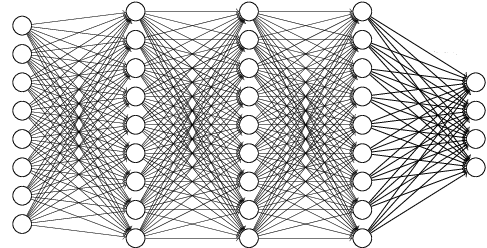

> Indented block



Origins of neural networks were inspired by the human brain itself (however the network design used now is very loosely connected to it). These networks consist of neurons where the connections between them is modelled with weights.
As we are moving forward in the network each output of a neuron calculated as the following: 
$$
a^{l}=σ(Wa^{l-1}+b)
$$
Where $a^{l}$ is the output of the neuron at the "l"th layer, $a^{l-1}$ is the output of the previous layer called activations, $W$ are the weights and $b$ is called bias.
Step by step as we are moving forward we will reach the end of the network, the output layer - the output of this layer will be the result provided by the network. At this point the network may have some error - the output is different from what is expected. To measure the difference we are using a mathematical function which is called loss function. Depending on the task we are trying to solve we may use different loss functions, and we may modify this loss function during the training.

One good example for a loss function is a simple mean squared error (called MSE):
$$
MSE=\frac{1}{n} \sum_{i=1}^{n} (y^{i} - \hat{y}^{i})^{2}
$$
Where $n$ is the number of examples seen by the network, $y$ is the expected output and $\hat{y}$ is the actual output.
Now that we have a numerical information about the error of the network we can try to mitigate it and optimize the network to for example in case image classification - minimize it.

The optimization method used ine neural networks in deep learning is called backpropagation. We are propagating the error back from the output to the input - meanwhile updating the weights and biases in each neuron.
If you are not into math - all you need to understand is that we are calculating how much a neuron is contributing to the final error and based on this number we are modifying its weight so the loss function will be optimized.


# Interactive Deep Learning Examples

## Using Colaboratory

Colaboratory, or "Colab" for short is an excellent tool to write and execute Python code in your browser with all the basic tools required for Machine Learning and AI already installed. When writing or running codes in this Colab page, you don't have to worry about installing anything on your computer.

The basic usage you need to know to use this material:


*   There are text and code cells, you can execute codes written in code cells. To execute a cell, click the play button, or type Ctrl+Enter on your keyboard.
*   If a variable is defined in one cell, it will be visible to the later cells. Because of this you should run all the cells in a submodule of this learning material in order not to run into error.
*   If a cell is taking too long time to finish you can interrupt its execution by selecting Runtime->Interrupt execution

If you are curious about the details, check out [Overview of Colab](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) or watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI).



## MNIST classification

### Introduction

When implementing neural networks and training them, data scientists rely on one of the several available deep learning frameworks. These frameworks, or libraries hides the low level processes under different level of abstractions. It makes it easier for beginners and professionals alike to define their neural networks, the data pipeline and the network training/evaluation. In this block we will go through one of the most simple examples typically used when one starts learning about neural networks and deep learning, or if one starts to learn a new deep learning framework.

There are several deep learning frameworks: Keras (https://keras.io/), tensorflow (https://www.tensorflow.org/), pytorch (https://pytorch.org/) and many others. Note that tensorflow has Keras integrated in their library. The current trend is that companies tend to use tensorflow while the academic research community prefers pytorch. In most cases, especially at beginner and even intermediate level it doesn't really matter what one chooses. In this tutorial we will use tensorflow and keras.

The below code blocks will contain the Python code for the tutorial. To execute the complete example, you have to run these blocks in order to prepare all the resources needed for the later blocks. You can run these blocks either by clicking the run icon highlighted when hovering over the block with your mouse pointer, or hit Ctrl+Enter when the selected box is active (you have to click in it). If you can't do it, the problem can be that you are not in playground mode, so click on the Open in playground command at the top. The first, most important code block contains the importing of the tensorflow library. This library will contain all the functionality we need for our example. We will also include numpy for some additional calculations and matplotlib for visualization purposes.

In [62]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Preparing and exploring the Data

After choosing the framework the next important step of a data science project is the data. Maybe you heard these terms: "Data is the new code" or "Data is the now oil". When working with neural networks, the available data is at least as important as the network itself. You can design the most complicated and state-of-the-art networks, of you don't have the sufficient data (in terms of size and variation), you won't get good results. Luckily there are several public dataset available ([Here is a list](http://deeplearning.net/datasets/)), in this tutorial we will use the most common datasets used by beginners for their first working example, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits.

The following block will download and prepare the MNIST data to be ready to used in your neural network training code. It may take some time. Notice the partitioning of the data to images/labels and train/test. The images are the pictures of the digits (28x28 pixels), the label is the number written on the images. Since we are focused on creating a classification network, we need a dataset with annotation, which are the true classes for each example. The other partitioning to train and test is another key aspect of machine learning and deep learning. When working with trainable methods, the traing data and the test data have to be separated to ensure the generelisation capability of the trained model. The main problem you want to avoid is overfitting, which can cause your model to work poorly on unseen data while performing perfectly on your training data (you can read about overfitting in details [here](https://elitedatascience.com/overfitting-in-machine-learning)).

In [63]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Usually if you are new to a dataset you should "explore" it, it means that you should check the size of the dataset, the shape of the images, the format of the annotation, just to name some. It is advised to visualize some examples to make sure you know how to handle your data.

Length of the train dataset:
60000
Length of the test dataset:
10000
Shape of the images:
(28, 28)
Example annotation
3


 Example train image:



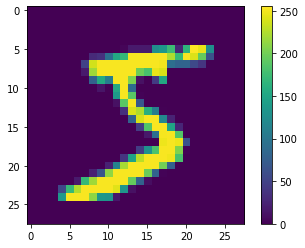

Label of above image: 
5


In [64]:
print("Length of the train dataset:")
print(len(train_images))
print("Length of the test dataset:")
print(len(test_images))
print("Shape of the images:")
print(train_images[0].shape)
print("Example annotation")
print(train_labels[3452])

# Visualize image
print("\n\n Example train image:\n")
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print("Label of above image: ")
print(train_labels[0])


The next step in every data science project is the preparation of data. Sometimes when working on improving models, the correctly designed data pipeline can mean the difference between the average and state-of-the-art results. In this example only one preprocessing step is executed, which is the scaling of the image values between 0 and 1. We need to divide our data by 255 to achieve this. Note that it is extremely important to preprocess your train and test data in the same way! (the exception is random augmentation of training data, but that is not covered in this example)

In [65]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Finally, to verify that the data is in a correct format, display randomly picked 25 examples with their labels

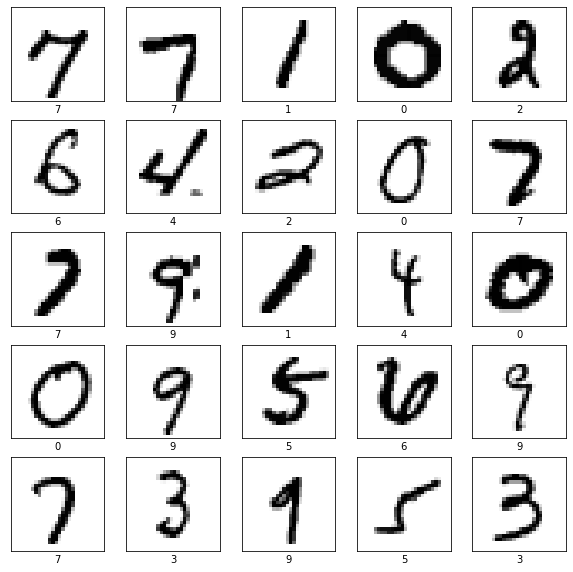

In [66]:
plt.figure(figsize=(10,10))
indices = np.random.randint(len(train_images), size=25)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(train_labels[idx])
plt.show()

### Building the Model

The next step in our example is creating the neural network itself. In tensorflow we can create a neural network using keras. Keras contains predefined layers, so for basic tasks we just need to put together some chosen layers without worrying about the underlying operations. For this simple task a simple network in enough, containing only fully-connected layers (Dense layer in keras). At the beginning of the model we need to adjust our input to the Dense layer, so it needs to be flattened (since the original shape is 2 dimensional). After the intermediate Dense layers we use rectified linear unit activation function (relu). It is quite standard to use relu, without going into details it helps avoid some problems with deeper networks and make them easier to train. Note that the last Dense layer output channel number has to match the number of classes in our classification task! Also note that it has no activation function (this is because the chosen loss function, explained in the next section).

In [67]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10)
])

Now we have our data prepared and we defined a neural network capable of outputting 10 numbers for each input image. But what are these 10 numbers? When solving classification problems the neural networks are designed to output probabilities for the input corresponding to each possible class. In our example a big value in the third position of the output for an image indicates that the image shows the number 3. The ideal solution for a an image with a true label of y is a vector where the values in every position apart from y are close to zero.

To train a neural network, we will use gradient descent optimization technic. This requires first to calculate a so called loss value, which is high if the network guesses wrong and decreases as the network predictions becomes more accurate. Then we propagate this error value back through the network using the gradient chain rule, which requires the gradient calculation of each operation in our network. Luckily, modern deep learning frameworks execute this processes automatically, in simple cases we just have to define loss functions and optimizers. For this classification problem we will use Sparse Categorical Crossentropy as loss function and Stochastic Gradient Descent as optimizer. Note the from_logits=True setting in the loss functions, this is required when we did not put activation funcstion after the last Dense layer. Another solution is putting the "softmax" activation after the last layer, and using the same loss function with from_logits set to false. Our model is now ready and can be built with the built-in compile method. We also added a metric to track the accuracy of our prediction, since the loss value itself is hard to interpret. The model.summary() command will print out details about the built neural network.

In [68]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Training

We have everything prepared for training our neural network. To train the built model on the training dataset, we will use the built-in fit method of the keras model. The training images and annotations are fed into this method. The epochs paramater tells the fit method how many times to iterate over the complete dataset. It is advised to run multiple epochs of training. The below training process should take less than a minute, and should reach around 98% accuracy.

In [69]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8997
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1984 - accuracy: 0.9436
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1590 - accuracy: 0.9541
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1365 - accuracy: 0.9601
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9643
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0981 - accuracy: 0.9707
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0824 - accuracy: 0.9747
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.075

To check of your trained network generalize well on unseen data, evaluate it's performance on the test data using the built in evaluate method. You should see very similar accuracy as at the end of the training, around 97%. It is lower than the train accuracy, which is possibly due to overfitting.

In [70]:
model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.9658


[0.11978019773960114, 0.9657999873161316]

Now we see the accuracy, but sometimes we want to visualize some predictions. For this purpouse we have the built-in predict function of the model, which will output the raw output values for the provided input images. Since our output is a vector of class probabilities for each image, we need to determine the position of the highest value in each vector. This can be easily done with the argmax() function of the well-known numpy package. We use similar code to before to visualize randomly picked 25 images from the test dataset with their target and predicted class number. Feel free to run it multiple times. You should spot maximum 1-2 mistakes each time.

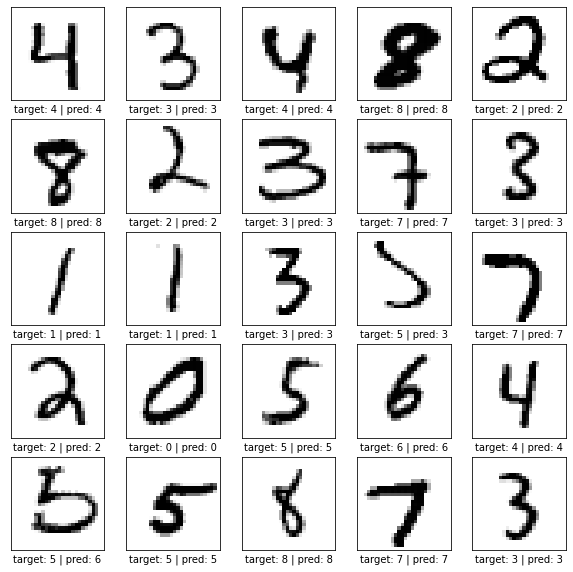

In [71]:
plt.figure(figsize=(10,10))
indices = np.random.randint(len(test_images), size=25)
predictions = np.argmax(model.predict(test_images[indices]), axis=-1)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xlabel("target: " + str(test_labels[idx]) + " | pred: " + str(predictions[i]))
plt.show()

### Assignment

The above result for the MNIST classification task is great, but the dataset is very simple. Your task is to train a classification network on the Fashion MNIST dataset! You should reach around 90% training and 88% test accuracy.

Some tips:


*   To make it easier for you, some basic functions and comments suggesting the structure of the code are already written
*   The two basic improvement you can make on the network seen in the above example: increasing the size of the intermediate Dense layer, or add an additional Dense layer before the output Dense layer (it will be a hidden layer).
*    You can modify the number of training epochs. Larger networks tend to train slower. If you see big jump in training accuracy even at the last training epoch, you should increase the number of training epochs.
*    Don't use too high values for Dense layer sizes. You will notice if your network is too big and compley if either your training times become extremely long, or your evaluation accuracy is below your training accuracy (so your network overfitted on the training data). We suggest to keep your training time under 10 seconds per epoch.
*    To counter overfitting when experimenting with larger networks, a useful trick is to use a Dropout layer before the last Dense layer. A rate between 0 and 1 has to be given to the function (e.g. tf.keray.layers.Dropout(0.5) ), and this layer will randomly "drop" (set to zero) the values it receives. Without going into details it helps keeping larger networks from overfitting.
*    Advanced tip: Remember when we normalized our input values between 0 and 1? Similar steps can be done inside the network with the BatchNormalization() layer (it will normalize the values to 0 mean and unit variance). Try to put it after the intermediate Dense layers and check the results!

If you are stuck, or you are curious how we solved the task, click the below section to reveal an example model with an average train-test accuracy around 91%.


In [72]:
# Downloading the Fashion MNIST dataset (no need to modify)
fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()
print("Length of the train dataset:")
print(len(fashion_train_images))
print("Length of the test dataset:")
print(len(fashion_test_images))
print("Shape of the images:")
print(fashion_train_images[0].shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Length of the train dataset:
60000
Length of the test dataset:
10000
Shape of the images:
(28, 28)


In [73]:
# Preprocess fashion_train_images and fashion_test_images
fashion_train_images, fashion_test_images = fashion_train_images / 255.0, fashion_test_images / 255.0

In [88]:
fashion_train_images = np.reshape(fashion_train_images, (fashion_train_images.shape[0], 28, 28, 1))

In [93]:
fashion_test_images = np.reshape(fashion_test_images, (fashion_test_images.shape[0], 28, 28, 1))

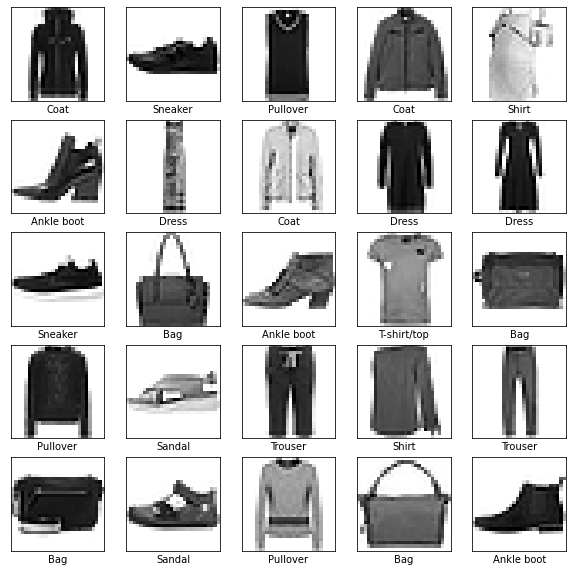

In [74]:
# End of preprocess

# Visualization (no need to modify)
plt.figure(figsize=(10,10))
indices = np.random.randint(len(fashion_train_images), size=25)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[fashion_train_labels[idx]])
plt.show()


In [90]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(56, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(56, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(56, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [91]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()
print("\n\nModel Training...\n\n")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_6 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 56)              

In [94]:
model.fit(fashion_train_images, fashion_train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3182 - accuracy: 0.8837
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3083 - accuracy: 0.8867
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2982 - accuracy: 0.8901
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2893 - accuracy: 0.8944
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2822 - accuracy: 0.8964
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2764 - accuracy: 0.8987
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2690 - accuracy: 0.9008
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2629 - accuracy: 0.9038
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9065
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

In [95]:
model.evaluate(fashion_test_images, fashion_test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.8938


[0.5662925243377686, 0.8938000202178955]

TypeError: ignored

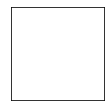

In [96]:

# End visualization (no need to modify)
plt.figure(figsize=(10,10))
indices = np.random.randint(len(fashion_test_images), size=25)
predictions = np.argmax(model.predict(fashion_test_images[indices]), axis=-1)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_test_images[idx], cmap=plt.cm.binary)
    plt.xlabel("target: " + class_names[fashion_test_labels[idx]] + "\npred: " + class_names[predictions[i]])
plt.subplots_adjust(hspace=0.4)
plt.show()

#### Example solution, click to show

In [ ]:
# Downloading the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()
print("Length of the train dataset:")
print(len(fashion_train_images))
print("Length of the test dataset:")
print(len(fashion_test_images))
print("Shape of the images:")
print(fashion_train_images[0].shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess fashion_train_images and fashion_test_images
fashion_train_images, fashion_test_images = fashion_train_images / 255.0, fashion_test_images / 255.0
# fashion_train_images = (fashion_train_images - np.mean(fashion_train_images) / np.std(fashion_train_images))
# fashion_test_images = (fashion_test_images - np.mean(fashion_test_images) / np.std(fashion_test_images))
# End of preprocess

# Visualization
plt.figure(figsize=(10,10))
indices = np.random.randint(len(fashion_train_images), size=25)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[fashion_train_labels[idx]])
plt.show()

# Model definition (Note that input shape and number of classes is the same)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  # tf.keras.layers.Dense(32, activation='relu'),
  # tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10)
])
# End of model definition

# Define loss fn here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compiling the model
print("Model Building...")
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()
print("\n\nModel Training...\n\n")
model.fit(fashion_train_images, fashion_train_labels, epochs=20)

print("\n\nModel Evaluation...\n\n")
model.evaluate(fashion_test_images,  fashion_test_labels)

plt.figure(figsize=(10,10))
indices = np.random.randint(len(fashion_test_images), size=25)
predictions = np.argmax(model.predict(fashion_test_images[indices]), axis=-1)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fashion_test_images[idx], cmap=plt.cm.binary)
    plt.xlabel("target: " + class_names[fashion_test_labels[idx]] + "\npred: " + class_names[predictions[i]])
plt.subplots_adjust(hspace=0.4)
plt.show()

## CIFAR autoencoder

### Introduction

In this example you will train an autoencoder on RGB images. An autoencoder is a type of neural network, where an encoder first compresses the input image to a so called latent space, and than a decoder reconstructs the image from the compressed representation. You can look at it as a deep learning version of image compression (like JPEG)

![alt text](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

Since you need to train this network on a dataset, it won't function as a general compression algorithm, but it can be still useful. A trained autoencoder can be used for data denoising (which will be your optional task at the end of this example). If you want to try out some advanced visualization tool dimensionality reduction is a requirement, which can be generally better achieved with autoencoders than basic techniques (like PCA). A good example is the t-SNE alogorithm, which maps your data to a 2D plane for visualization, but it requires low dimensional data.

In [97]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Preparing and exploring the Data

In thiy example you will work with the CIFAR10 dataset consisting of RGB images from 10 types of real world objects.

In [98]:
cifar = tf.keras.datasets.cifar10
(cifar_train_images, _), (cifar_test_images, _) = cifar.load_data()

170500096/170498071 [==============================] - 13s 0us/step


The dataset size is similar to MNIST, but the shape is different: the image resolution is 32x32 and we have the 3 RGB channels.

In [99]:
print("Length of the train dataset:")
print(len(cifar_train_images))
print("Length of the test dataset:")
print(len(cifar_test_images))
print("Shape of the images:")
print(cifar_train_images[0].shape)

Length of the train dataset:
50000
Length of the test dataset:
10000
Shape of the images:
(32, 32, 3)


The same preprocessing step can be applied here as well.

In [100]:
cifar_train_images, cifar_test_images = cifar_train_images / 255.0, cifar_test_images / 255.0

You can run this visualization code multiple times to look at examples from the dataset.

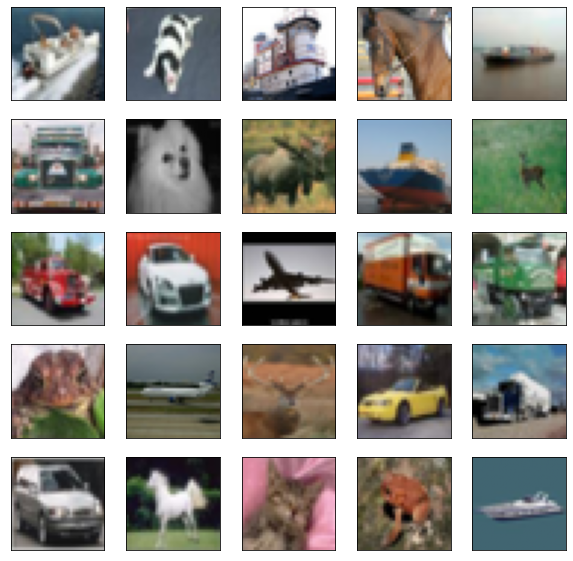

In [101]:
plt.figure(figsize=(10,10))
indices = np.random.randint(len(cifar_train_images), size=25)
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_train_images[idx])
plt.show()

### Building the Model

In this example we will use convolutional neural network, which is in general better suited for image processing tasks. Without going into details a convolutional layer in a neural network learns several filters (represented by matrices), and apply these filters on it's input. Due to using the same filters across the spatial dimensions, a convolutional network tends to learn spatial indifferent features.

In the following code we first define the encoder part of the network as a series of convolutional layers. We specify the number and size of the filters, the activational function and we define the striding behaviour. When we define a convolutional layer with stride bigger than 1, the kernels will be applied in a sparse way, so the output will be smaller spatially than the input. In the case of stride=2, the convolutional layer will halve the size of it's input. It is important to use strided convolutions in the encoder, because we want to get a compressed representation. At the end of the encoder we apply a Dense layer to get the compressed vector with the specified size (this is the latent_dim specified before the model building). The decoder conists of Transposed Convolution layers, which basically the inverse of Convolutional layers. We need those to have a symmetrical architecture. By the last layer the shape must be equal to our input (same amount of encoder and decoder strided operations and 3 filters in the last layer to allow RGB output). The last activation is sigmoid, because our input is transformed between 0 and 1, and this function transforms it's input in the same range.

In [103]:
latent_dim = 512

autoencoder_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(latent_dim, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Reshape(target_shape=(4, 4, latent_dim // 16)),
  tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(filters=8, kernel_size=3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2, padding="same", activation="sigmoid")
])

We define our loss and compile the model with a chosen optimizer.

In [104]:
autoencoder_loss_fn = tf.keras.losses.BinaryCrossentropy()

autoencoder_model.compile(optimizer='adam',
              loss=autoencoder_loss_fn)
autoencoder_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 16, 16, 4)         112       
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 4)         16        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 8)           296       
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 8)           32        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 16)          1168      
_________________________________________________________________
batch_normalization_8 (Batch (None, 4, 4, 16)          64        
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)             

### Training

To train our network, we have to use our training images as our inputs and as our targets! The below training process takes around one minute per epoch, so start it and have a quick break :)

In [107]:
autoencoder_model.fit(cifar_train_images, cifar_train_images, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5955
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5695
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5672
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5659
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5650


Evaluation of the model. You should see similar loss value as at the end of the training.

In [108]:
autoencoder_model.evaluate(cifar_test_images, cifar_test_images)

313/313 [==============================] - 1s 3ms/step - loss: 0.5626


0.562582790851593

Now let's look at the reconstruction quality! The below code plots 25 random images from the test set and puts the reconstructed images next to them. If you want to, experiment with the latend_dim parameter at the model definition! Change it, and run all the blocks after that again. With smaller latent_dim, the reconstructions are blurrier, and in general poorer quality. With greater latent_dim you will se better resolution.

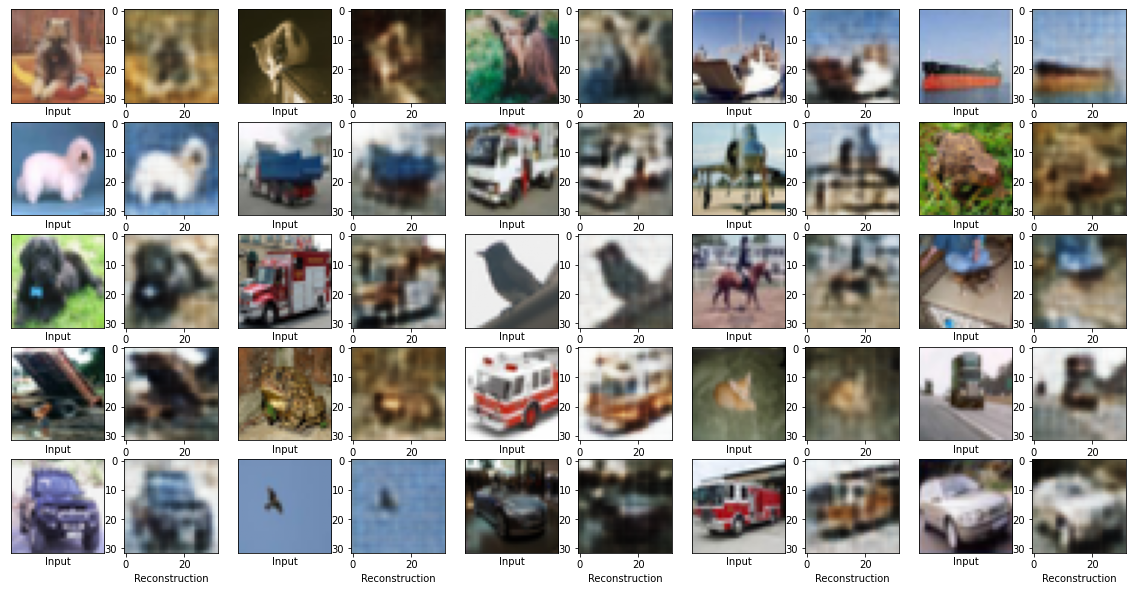

In [109]:
plt.figure(figsize=(20,10))
indices = np.random.randint(len(cifar_test_images), size=25)
predictions = autoencoder_model.predict(cifar_test_images[indices])
for i, idx in enumerate(indices):
    plt.subplot(5,10,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_test_images[idx])
    plt.xlabel("Input")
    plt.subplot(5,10,2*i+2)
    plt.imshow(predictions[i])
    plt.xlabel("Reconstruction")
plt.show()

### Assignment

In the introduction we mentioned the data denoising capability of an autoencoder. Let's try it out now! If you trained an autoencoder in the previous section, and the test reconstruction looks OK, you can use the same model for image denoising!

Your task iss to generate noisy images, generate renconstructions of the noisy images with the trained autoencoder, and visualize the results. As before, you can check the example solution by clicking on the next section. (Tip: use the previous coding block as a base). Note that altough an autoencoder with greater latent_dim produces nicer reconstructions, but the image denoising capability tends to suffer with greater latent_dim. The default 512 value is a nice midpoint, the trained model should denoise at quite a good level and the reconstructions should look nice.

Tip: the following function may come in handy when generating the noise: [np.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)

In [ ]:
# Generate noisy images (either transform the whole cifar_test_images or just a part of it)

# Generate predictions with the autoencoder

# Visualize the results

In [116]:
cifar_test_noise = np.random.normal(0, 0.1, cifar_test_images.shape)
cifar_test_images += cifar_test_noise 

In [117]:
autoencoder_model.evaluate(cifar_test_images, cifar_test_images)

313/313 [==============================] - 1s 2ms/step - loss: 0.5808


0.5807545781135559

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

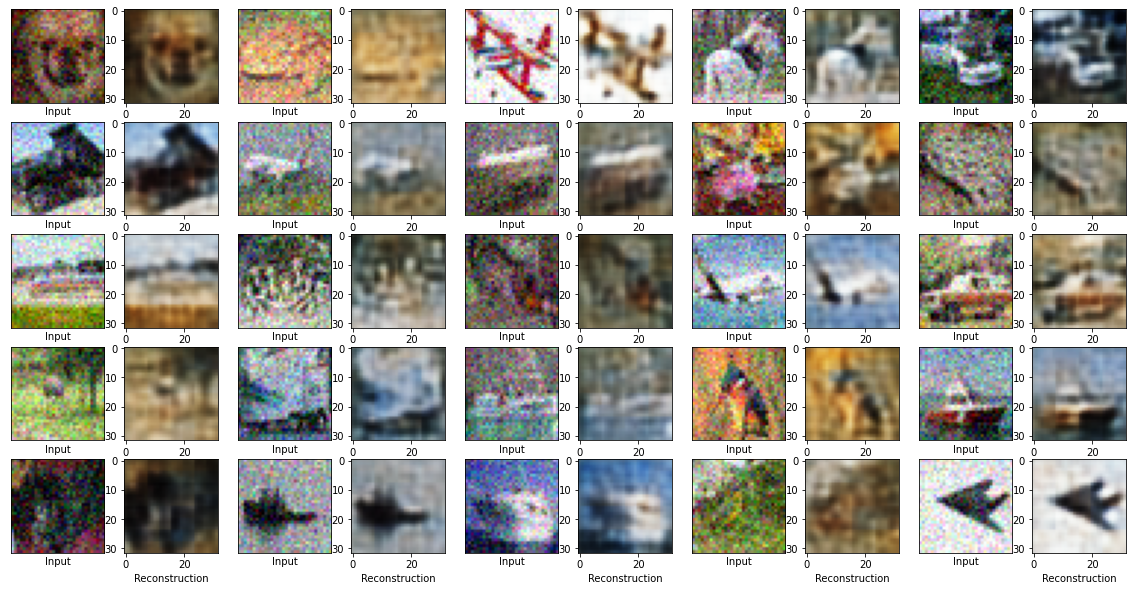

In [118]:
plt.figure(figsize=(20,10))
indices = np.random.randint(len(cifar_test_images), size=25)
predictions = autoencoder_model.predict(cifar_test_images[indices])
for i, idx in enumerate(indices):
    plt.subplot(5,10,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_test_images[idx])
    plt.xlabel("Input")
    plt.subplot(5,10,2*i+2)
    plt.imshow(predictions[i])
    plt.xlabel("Reconstruction")
plt.show()

#### Example solution, click to show

In [ ]:
# Generate noisy images (either transform the whole cifar_test_images or just a part of it)
cifar_test_images_noisy = np.clip(cifar_test_images + 0.2 * np.random.normal(loc=0.0, scale=0.4, size=cifar_test_images.shape), 0.0, 1.0)
# Generate predictions with the autoencoder
indices = np.random.randint(len(cifar_test_images_noisy), size=25)
predictions = autoencoder_model.predict(cifar_test_images_noisy[indices])
# Visualize the results
plt.figure(figsize=(20,10))
for i, idx in enumerate(indices):
    plt.subplot(5,10,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_test_images_noisy[idx])
    plt.xlabel("Input")
    plt.subplot(5,10,2*i+2)
    plt.imshow(predictions[i])
    plt.xlabel("Reconstruction")
plt.show()